# Exploration on CO<sub>2</sub> and Greenhouse Gases (GHGs) Emissions


### Data Source: Our World in Data

Data from Feenstra et al. (2015) Penn World Table v10.0 via Our World in Data.

- Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), 
  “The Next Generation of the Penn World Table” American Economic Review, 105(10), 3150-3182
- Max Roser (2013) – “Economic Growth”. Published online at OurWorldInData.org. 
  Retrieved from: ‘https://ourworldindata.org/economic-growth’ [Online Resource]

___

# 01 Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import linregress

import warnings
warnings.filterwarnings('ignore')

___

# 02 Data Cleaning

In [2]:
# Load the dataset
df = pd.read_csv('owid-co2-data.csv')

### Check Main Feathurs (head, shape, info)

This dataset contains:
- 50191 entries --> next, check the duplicated data
- 79 columns 
    - which two columns are categorical data: 'country' and 'iso_code'
    - the rest are numerical data

NaNs were observed in the dataset. --> next, check if some entries might contain empty space (white space)



In [3]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(50191, 79)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

### Standardize column name following Pe-8 (snake case)

Note that column names look like snake case, but there might be a case that it contains white space and we won't able to see it.


Therefore it is a good practice to always make sure they are following Pe-8.


As we work with big data, we do not always check column by column, rather, we manipulate them from the start.

In [6]:
# Rename the columns for clarity, make sure they are following Pe-8 rule
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]

# Check names of the column
# df.columns.tolist()

### Cleaning Up Whitespace
#### Remove whitespace from string values in all columns

Make sure that all categorical variables (which contains string values) are cleaned

In [7]:
def whitespace_remover(df):
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = df[i].str.strip()
        else:
            pass
        
whitespace_remover(df)

### Dealing with Nulls

There are many NaNs in this dataset (check below)

We will leave it for now. Until we want to extract insights from particular data, and the missing values might affect the results. 

<AxesSubplot:>

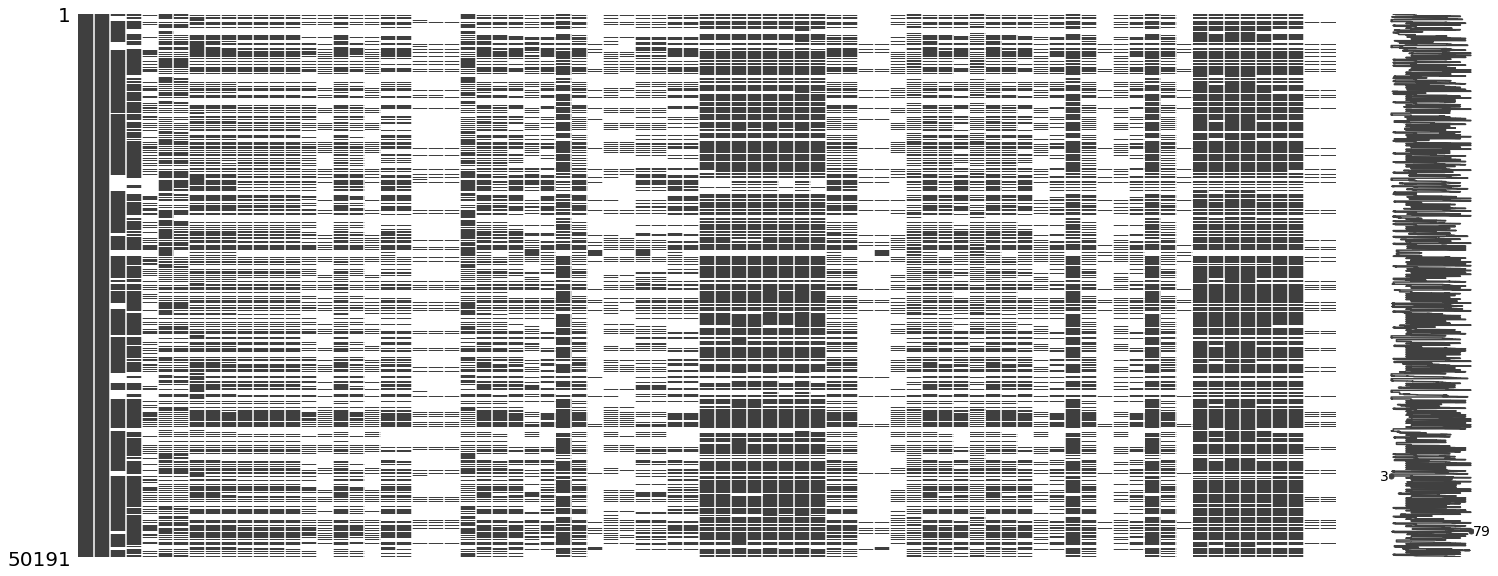

In [8]:
# Visualize missing data
msno.matrix(df)

In [9]:
# Check %NaN
nulls = pd.DataFrame(round(df.isna().sum()*100/len(df), 2))
nulls.columns = nulls.column=['%NaN']
nulls

,%NaN
country,0.00
year,0.00
iso_code,15.80
population,18.27
gdp,69.61
...,...
temperature_change_from_n2o,24.17
total_ghg,25.46
total_ghg_excluding_lucf,25.81
trade_co2,90.96


### Check Duplicated Data Entries

No duplicated data found.

In [10]:
# Check duplicated rows
df.duplicated().sum()

0

___

# 03 Exploratory Data Analysis (EDA)

## EDA - Lead Questions

### The Idea

In 2024, global temperatures reached unprecedented levels, marking the warmest year on record. The World Meteorological Organization (WMO) reported that the global mean temperature was approximately 1.55°C above pre-industrial levels, surpassing the 1.5°C threshold set by the Paris Agreement for the first time. ([wmo.int](https://wmo.int/news/media-centre/wmo-confirms-2024-warmest-year-record-about-155degc-above-pre-industrial-level?utm_source=chatgpt.com))

Similarly, the National Oceanic and Atmospheric Administration (NOAA) confirmed that Earth's average land and ocean surface temperature in 2024 was 1.29°C above the 20th-century average, making it the highest global temperature in NOAA’s 1850-2024 climate record. ([noaa.gov](https://www.noaa.gov/news/2024-was-worlds-warmest-year-on-record?utm_source=chatgpt.com))

In addition, the [2024 Living Planet Report](https://livingplanet.panda.org/en-GB/) highlights a global crisis, revealing a catastrophic decline of 73% in wildlife populations over the last 50 years (1970-2020), as measured by the Living Planet Index (LPI).

Such a drastic decline in biodiversity, coupled with the increasing global temperatures, cannot be ignored.

### Why CO<sub>2</sub> and Greenhouse Gases?

Many factors contribute to climate change and biodiversity loss, but one stands out as particularly significant—and potentially the most critical: the rise in global temperatures driven by increased CO<sub>2</sub> and greenhouse gases (GHGs) emissions. And the rate at which these gases are removed from the atmosphere can no longer keep pace with their accumulation, causing them to persist in the atmosphere for hundreds to thousands of years, resulting in a dramatic rise in global temperatures.

In this analysis, we will explore how CO<sub>2</sub> and GHG emissions have changed over time and investigate the underlying patterns in relation to temperature changes.


___


## 3.1 How Global CO₂ Emissions Have Changed Over Time

To begin, let's examine the overall trend of CO<sub>2</sub> emissions on our planet.

Note that the dataset contains the amount of CO<sub>2</sub> and GHG emissions in million tonnes (Mt). To analyze trends on a global scale and keep the audience engaged, I choose to present the chart using a larger unit, such as gigatonnes (Gt).

This approach simplifies the numbers, making the chart cleaner and easier to read. As a result, we convert the data into gigatonnes (Gt).

However, the CO<sub>2</sub> data in million tonnes (Mt) is remained in the dataset because it is still needed for more smaller scale analyses, such as examining emissions at the sectoral or country level. Detailed local data is essential for such analyses.

Therefore, I converted CO<sub>2</sub> (Mt) into CO<sub>2</sub> (Gt) and assigned it to a new column, 'co2_in_gt' (see code below).

In [11]:
# Convert 'co2' and 'total_ghg' from Mt to Gt
df['co2_in_gt'] = df['co2'] / 1000
df['ghg_in_gt'] = df['total_ghg'] / 1000

In [12]:
# Selects the necessary columns for analysis.
new_df = df[['country', 'year', 'temperature_change_from_co2', 'co2_in_gt', 'ghg_in_gt']]
new_df.head()

,country,year,temperature_change_from_co2,co2_in_gt,ghg_in_gt
0,Afghanistan,1750,NaN,NaN,NaN
1,Afghanistan,1751,NaN,NaN,NaN
2,Afghanistan,1752,NaN,NaN,NaN
3,Afghanistan,1753,NaN,NaN,NaN
4,Afghanistan,1754,NaN,NaN,NaN


In [13]:
# Remove NaN values
new_df = new_df.dropna(subset=['co2_in_gt'])  

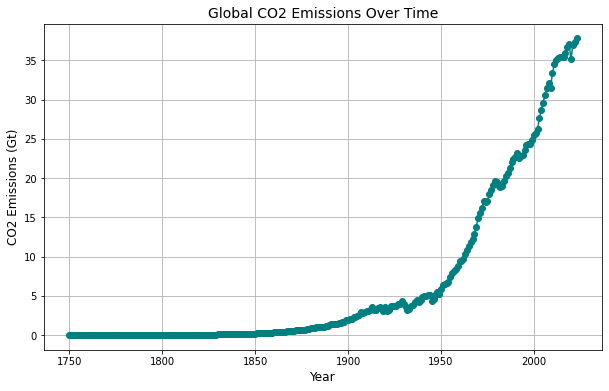

In [14]:
# Filter for "World"
world_data = new_df[new_df['country'] == 'World']

# Line plot with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(world_data['year'], world_data['co2_in_gt'], marker='o', linestyle='-', color='teal')

# Add title and labels
plt.title('Global CO2 Emissions Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (Gt)', fontsize=12)
plt.grid(True)
plt.show()

### Observation:
- The CO<sub>2</sub> emission rate after 1950 is approximately **19 times higher** than in the years before, with a rate of 0.45 gigatonnes per year. (See code below.)

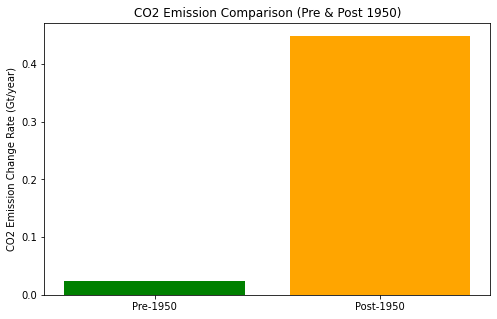

Pre-1950 Emission Rate: 0.02 Gt/year
Post-1950 Emission Rate: 0.45 Gt/year
The CO2 emission rate after 1950 is approximately 19.33 times higher than in the years before.


In [15]:
# Kyoto Protocol was adopted in 1997, came into effect in 2005
pre_1950 = world_data[world_data['year'] < 1950]   # Before Kyoto
post_1950 = world_data[world_data['year'] >= 1950]  # After Kyoto

# Calculate Rate of Change (Slope)
slope_pre, _, _, _, _ = linregress(pre_1950['year'], pre_1950['co2_in_gt'])
slope_post, _, _, _, _ = linregress(post_1950['year'], post_1950['co2_in_gt'])

# Plot Bar Graph
labels = ['Pre-1950', 'Post-1950']
values = [slope_pre, slope_post]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'orange'])
plt.ylabel('CO2 Emission Change Rate (Gt/year)')
plt.title('CO2 Emission Comparison (Pre & Post 1950)')
plt.show()

# Compare the rates
comparison_factor = slope_post/slope_pre

# Print Results
print(f"Pre-1950 Emission Rate: {slope_pre:.2f} Gt/year")
print(f"Post-1950 Emission Rate: {slope_post:.2f} Gt/year")
print(f"The CO2 emission rate after 1950 is approximately {comparison_factor:.2f} times higher than in the years before.")



___

## 3.2 How CO₂ Emissions Have Influenced Temperature Change Over the Years

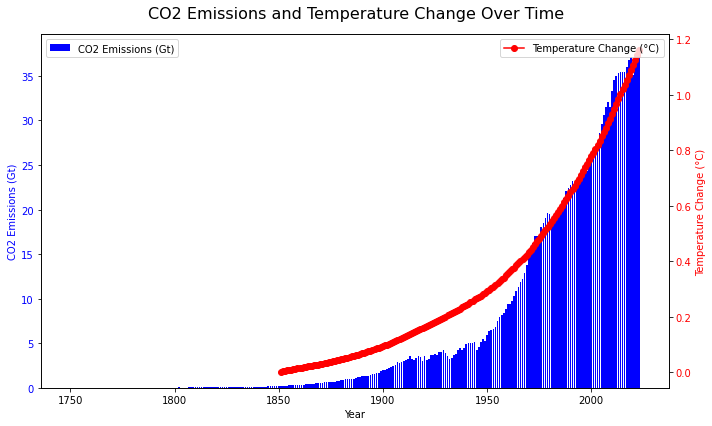

In [16]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary y-axis for CO2 emissions
ax1.bar(world_data['year'], world_data['co2_in_gt'], color='blue', label='CO2 Emissions (Gt)')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (Gt)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for temperature change
ax2 = ax1.twinx()
ax2.plot(world_data['year'], world_data['temperature_change_from_co2'], color='red', marker='o', label='Temperature Change (°C)')
ax2.set_ylabel('Temperature Change (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
fig.suptitle('CO2 Emissions and Temperature Change Over Time', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


### Observation:
1. After the year 1950, CO<sub>2</sub> emissions appear to increase drastically, with a noticeably steeper slope compared to the period from 1750 to 1950. Similarly, the slope of the temperature change also increases significantly, following a similar trend.


2. Here, we only analyze CO<sub>2</sub> emissions from human activities. However, this does not account for the atmospheric CO<sub>2</sub> that has accumulated over time. This raises the question: **How has CO<sub>2</sub> accumulated in the atmosphere over time?**
        

### Further Study:
- Suggestion: Examine atmospheric CO<sub>2</sub> levels alongside cumulative CO<sub>2</sub> emissions from human activities.


- This dataset includes information on cumulative CO<sub>2</sub>, allowing for further analysis (see the graph below under section 3.3).

___

## 3.3 How Temperature Change Correlates with Cumulative CO₂ Emissions Due to Human Activities

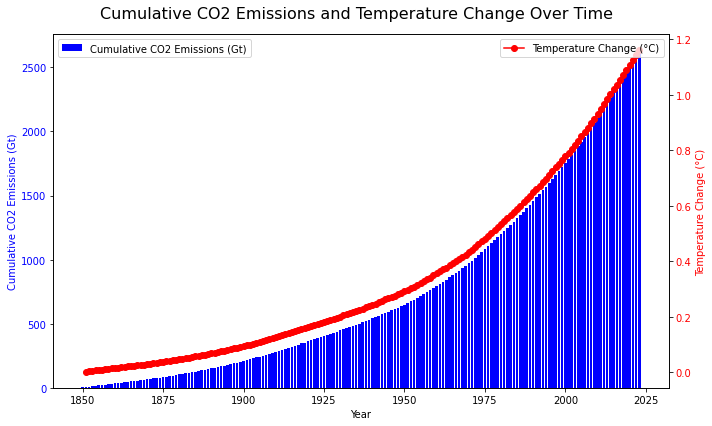

In [17]:
# Convert 'cumulative_co2_including_luc' from Mt to Gt
new_df['cumulative_co2_in_gt'] = df['cumulative_co2_including_luc'] / 1000

# Filter for "World" as we will explore on a global scale for now
world_data = new_df[new_df['country'] == 'World']


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary y-axis for CO2 emissions
ax1.bar(world_data['year'], world_data['cumulative_co2_in_gt'], color='blue', label='Cumulative CO2 Emissions (Gt)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative CO2 Emissions (Gt)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for temperature change
ax2 = ax1.twinx()
ax2.plot(world_data['year'], world_data['temperature_change_from_co2'], color='red', marker='o', label='Temperature Change (°C)')
ax2.set_ylabel('Temperature Change (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
fig.suptitle('Cumulative CO2 Emissions and Temperature Change Over Time', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


### Observation:  
1. This plot reveals a strong correlation between temperature change and cumulative CO<sub>2</sub> emissions. Notably, the increase in cumulative CO<sub>2</sub> emissions steepens between 1975 and 2024, with the trend in temperature change following a similar pattern.  

2. However, information on atmospheric CO<sub>2</sub> levels remains incomplete.  

### Further Study:  
- To fully understand the situation, we need to analyze atmospheric CO<sub>2</sub> levels alongside other greenhouse gases (GHGs), as outlined in the Kyoto Protocol (adopted in 1997 and amended in 2012). Since these gases significantly contribute to global warming and climate change, comparing their levels against global temperature changes would provide deeper insights.

___


## 3.4 How Greenhouse Gas Emissions Have Evolved Over Time

### Kyoto Protocol
According to the [Kyoto Protocol](https://unfccc.int/kyoto_protocol), organizations are required to limit and reduce not only CO<sub>2</sub> but also on other six [greenhouse gases](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Greenhouse_gas_(GHG)) emissions, as they contribute to global warming and climate change.

Kyoto basket

    -  Non-fluorinated gases:

        - Carbon dioxide (CO₂)
        - Methane (CH₄)
        - Nitrous oxide (N₂O)
    - Fluorinated gases:

        - Hydrofluorocarbons (HFCs)
        - Perfluorocarbons (PFCs)
        - Sulphur hexafluoride (SF₆)
        - Nitrogen trifluoride (NF₃)

___

Kyoto Protocol was adopted in 1997, came into effect in 2005

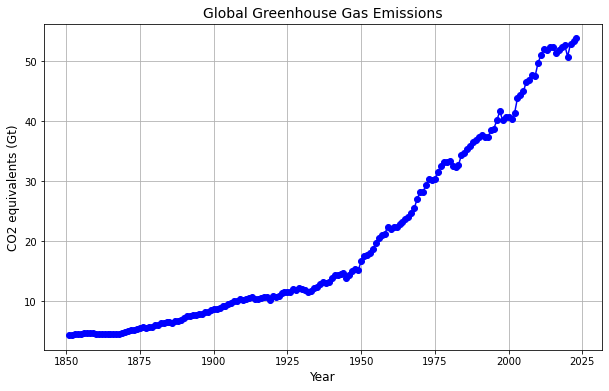

The average GHG emission change rate is 0.29 Gt/year


In [18]:
# Drop NaN
world_data.dropna(inplace=True)

# Line plot with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(world_data['year'], world_data['ghg_in_gt'], marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Global Greenhouse Gas Emissions', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 equivalents (Gt)', fontsize=12)
plt.grid(True)
plt.show()

# Calculate Rate of Change (Slope)
slope_pre, _, _, _, _ = linregress(world_data['year'], world_data['ghg_in_gt'])

print(f"The average GHG emission change rate is {slope_pre:.2f} Gt/year")

### 3.4.1 The GHG Emission Rate After the Kyoto Protocol
- The Kyoto Protocol was adopted on December 11, 1997, and entered into force on February 16, 2005, after meeting the requirement that at least 55 countries, accounting for at least 55% of global GHG emissions, ratify it.


- Therefore, we will examine the GHG emission rate before and after 2005 to assess its impact.

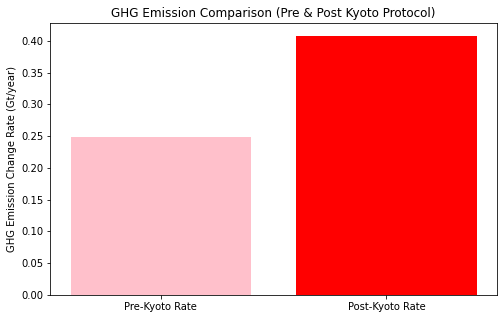

Pre-Kyoto GHG Emission Rate (Slope): 0.25 Gt/year
Post-Kyoto GHG Emission Rate (Slope): 0.41 Gt/year
The GHG emission rate post-Kyoto Protocol is approximately 1.64 times higher than in pre-Kyoto Protocol.


In [19]:
# Remove NaN values
world_data = world_data.dropna(subset=['ghg_in_gt'])

# Kyoto Protocol was adopted in 1997, came into effect in 2005
pre_kyoto = world_data[world_data['year'] < 2005]   # Before Kyoto
post_kyoto = world_data[world_data['year'] >= 2005]  # After Kyoto

# Calculate Rate of Change (Slope)
slope_pre, _, _, _, _ = linregress(pre_kyoto['year'], pre_kyoto['ghg_in_gt'])
slope_post, _, _, _, _ = linregress(post_kyoto['year'], post_kyoto['ghg_in_gt'])

# Plot Bar Grap'
labels = ['Pre-Kyoto Rate', 'Post-Kyoto Rate']
values = [slope_pre, slope_post]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['pink', 'red'])
plt.ylabel('GHG Emission Change Rate (Gt/year)')
plt.title('GHG Emission Comparison (Pre & Post Kyoto Protocol)')
plt.show()

# Compare the rates
comparison_factor = slope_post/slope_pre

# Print Results
print(f"Pre-Kyoto GHG Emission Rate (Slope): {slope_pre:.2f} Gt/year")
print(f"Post-Kyoto GHG Emission Rate (Slope): {slope_post:.2f} Gt/year")
print(f"The GHG emission rate post-Kyoto Protocol is approximately {comparison_factor:.2f} times higher than in pre-Kyoto Protocol.")


### Observation:
- Over the course of 174 years, since records began in 1850, GHG emissions have steadily increased at a rate of approximately 290 million tonnes per year.


- The GHG emission rate, especially after the Kyoto Protocol came into effect in 2005, has been increasing at a rate of 0.41 Gt/year, which is approximately 1.7 times higher than before the Protocol.


- Despite the commitments made under the Kyoto Protocol, emissions have not only failed to decrease but have continued to rise without any significant slowdown.


### Next Analysis:
- What if we take a closer look at GHG emissions after the commitments under the Paris Agreement (2015)? Has there been any significant change at a global level?

### 3.4.2 The GHG Emission Rate After the Paris Agreement

- The Paris Agreement entered into force on November 4, 2016, after being adopted on December 12, 2015, at COP21 in Paris.

- Therefore, we will examine the GHG emission rate before and after 2016 to assess its impact.

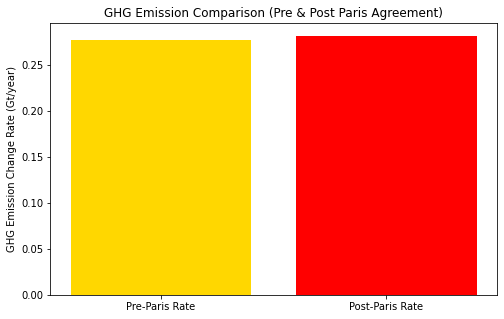

Pre-Paris GHG Emission Rate (Slope): 0.28 Gt/year
Post-Paris GHG Emission Rate (Slope): 0.28 Gt/year
The GHG emission rate post-Paris Agreement is approximately 1.02 times higher than in post-Paris Agreement.


In [20]:
pre_paris = world_data[world_data['year'] < 2016]   
post_paris = world_data[world_data['year'] >= 2016]  

# Calculate Rate of Change (Slope)
slope_pre, _, _, _, _ = linregress(pre_paris['year'], pre_paris['ghg_in_gt'])
slope_post, _, _, _, _ = linregress(post_paris['year'], post_paris['ghg_in_gt'])

# Plot Bar Grap'
labels = ['Pre-Paris Rate', 'Post-Paris Rate']
values = [slope_pre, slope_post]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['gold', 'red'])
plt.ylabel('GHG Emission Change Rate (Gt/year)')
plt.title('GHG Emission Comparison (Pre & Post Paris Agreement)')
plt.show()

# Compare the rates
comparison_factor = slope_post/slope_pre

# Print Results
print(f"Pre-Paris GHG Emission Rate (Slope): {slope_pre:.2f} Gt/year")
print(f"Post-Paris GHG Emission Rate (Slope): {slope_post:.2f} Gt/year")
print(f"The GHG emission rate post-Paris Agreement is approximately {comparison_factor:.2f} times higher than in post-Paris Agreement.")


### Key Differences Between Kyoto Protocol & Paris Agreement

 
The **Kyoto Protocol** had **binding commitments for developed countries only**, whereas the **Paris Agreement** involves **all countries** with **voluntary commitments**.

#### Kyoto Protocol (1997)
##### 🔹 Binding Emission Targets:
- Developed countries were given **legally binding targets** to reduce GHG emissions (collectively **5% below 1990 levels**).
- Targets were set for a **commitment period (2008-2012)**.

##### 🔹 Differentiated Responsibility:
- Developed countries (**Annex I nations**) were expected to take the lead in emission reductions.
- Developing countries (**non-Annex I nations**) were **not required** to have binding reduction targets.

---

#### Paris Agreement (2015)
##### 🔹 Global Participation:
- Unlike the Kyoto Protocol, the Paris Agreement **includes all countries** (both developed and developing) with **nationally determined contributions (NDCs)**.

##### 🔹 Voluntary Emission Reductions:
- Countries **set their own targets** for GHG reductions based on their **national circumstances, capabilities, and priorities**.
- **No legally binding reduction targets**—instead, countries are encouraged to **update their NDCs every five years** and increase ambition.

---

### Observations:
- Despite the **Kyoto Protocol's legally binding targets**, **GHG emissions continued to rise** after its implementation.  


- The **Paris Agreement (effective since 2016)** has helped stabilize emissions. However, **it has failed to reduce emissions on a global scale**.

  - This means emissions **are still accumulating in the atmosphere** and **worsening climate change**.  
  
  
- Both the Kyoto Protocol and the Paris Agreement have failed to achieve significant global emission reductions, indicating that current policies are not effective enough, and a better approach is needed to tackle this issue.

___


## Thoughts

- The **atmosphere is a dynamic system**, with each greenhouse gas (GHG) having a distinct **lifespan and behavior**. Some GHGs are **naturally removed** through chemical reactions, making the system highly complex.  


- To effectively **understand and manage** GHG emissions, we must consider **not only emission rates but also how gases transform and interact over time**. One way to establish a direct correlation is by **analyzing atmospheric components** and measuring the **concentration of each GHG relative to global temperature rise**.  


- While **reducing GHG emissions alone does not fully account for global temperature changes**, and emissions may not completely explain temperature fluctuations, **tracking them is essential** for understanding and mitigating their impact. Monitoring emissions helps:  


  - **Measure environmental impact** at corporate and national levels.  
  - **Promote accountability** in climate action.  
  - Enable **solutions** such as:  
    - **GHG removal** from the atmosphere.  
    - **Air treatment systems** before emissions are released.  
    - **Emission reduction strategies** through better resource use.  
    - **Optimizing production processes** for efficiency.  
    - **Eliminating unnecessary emissions** to minimize waste.  

## 🌍 Conclusion & Final Thoughts  

### Why Tracking GHG Emissions is Critical  

- **Tracking GHG emissions is the foundation of effective climate management.**  
- Large industries, policymakers, stakeholders, and individuals **share the responsibility** of reducing emissions and **minimizing environmental impact**.  
- **Consistent monitoring** helps us:  
  - Gain insights into **corporate and industrial activities**.  
  - Identify the **most effective strategies** for emission reduction.  
  - Optimize **resource use and production efficiency**.  
  - Shape **better global policies** to drive sustainability.  

By **tracking, managing, and mitigating emissions**, we take a crucial step toward a cleaner, more sustainable future. 🌱  


## Any Thoughts?

- The **atmosphere is a dynamic system**, and each greenhouse gas (GHG) has its own **lifespan**. Some GHGs are **removed through atmospheric chemical reactions**, making the system highly complex.  


- To fully understand and manage this system effectively, we need to consider **not only emissions but also how these gases transform and are absorbed over time**. One way to establish a direct correlation is by **analyzing atmospheric components** and measuring the **concentration of each GHG relative to global temperature rise**.  


- Although **GHG emissions alone may not fully explain global temperature changes**, **tracking emissions is essential** in understanding and mitigating their impact. Monitoring emissions helps:
  - Measure a company's **contribution to environmental changes**.  
  - **Promote accountability** in climate action.  
  - Enable **solutions** like:
    - GHG removal from the atmosphere.  
    - Air treatment systems before emissions are released.  
    - Emission reduction strategies.  
    - Optimizing production processes.  
    - Eliminating unnecessary emissions.
    - etc.
    
___


## 🌍 Conclusion & Final Thoughts  

### Why Tracking GHG Emissions is Important  

- **Tracking GHG emissions is the foundation of effective management.**  

- Large industrial companies, partners, stakeholders, and even individuals **all share the responsibility** of managing emissions and **mitigating their environmental impact**.  

- **Keeping track of emissions** helps us:  
  - Understand **company and organizational activities**.  
  - Identify **the best methods and solutions** to reduce emissions.  
  - Optimize **production efficiency** with fewer resources.  
  - Develop **better global policies** for a sustainable future.  
  

### By **monitoring and managing emissions**, we take a crucial step toward a cleaner, more sustainable world. 🌱  


___

## References & Additional Resources for Further Research
- [Global Temperature](https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt)

- [GLOBAL LAND-OCEAN TEMPERATURE INDEX](https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt)
Data source: NASA's Goddard Institute for Space Studies (GISS). Credit: NASA/GISS 
- [NOAA Global and Hemispheric Temperature Anomalies](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/tavg/land_ocean/1/12/1850-2024)
- [Kyoto Protocol Reference Manual](https://unfccc.int/resource/docs/publications/08_unfccc_kp_ref_manual.pdf)
- [Main Greenhouse Gases](https://www.c2es.org/content/main-greenhouse-gases/)

___